# RBC with Irreversible Investment

- Give a good initial guess
- Normalize the inputs to the neural network
- normalize the multiplier and bound the investment and consumption variables. 

### Parameters and Network Structure

In [46]:
import tensorflow as tf
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt
from tqdm import tqdm as tqdm
import datetime
from typing import Tuple
class Vector: pass
from keras.models import Model
from keras.layers import Input, Dense


In [47]:
# Model parameters
β = 0.99
α = 0.36
δ = 0.025
σ = 2.0
ϕ = 0.975
ρ = 0.90; 
Z = np.array([0.9, 1.1])
z_l = Z[0]
z_h = Z[1]
P = np.array([[0.9, 0.1], [0.1, 0.9]])
Kss = ((1/β+δ-1)/(α))**(1/(α-1))
Iss = δ*Kss;
Imin = ϕ*Iss;
print(Kss, Iss)
xmin=Kss*0.1
xmax=Kss*6
λ=1
xvec = np.power(np.linspace(xmin**(1/λ),xmax**(1/λ),200,dtype='float32'),λ).reshape(-1,1)

37.98925353815241 0.9497313384538103


In [75]:
initializer = tf.keras.initializers.GlorotUniform()

x = Input(shape = (1,))
##c_high
interp_c_h_1 = Dense(32, input_dim=1, activation = 'tanh', kernel_initializer=initializer)(x)
interp_c_h_2 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_c_h_1)
interp_c_h_3 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_c_h_2)
interp_c_h_4 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_c_h_3)
interp_c_h_5 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_c_h_4)
c_l = Dense(1,activation=tf.keras.activations.linear)(interp_c_h_5)

##invst high
interp_i_h_1 = Dense(32, input_dim=1, activation = 'tanh', kernel_initializer=initializer)(x)
interp_i_h_2 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_i_h_1)
interp_i_h_3 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_i_h_2)
interp_i_h_4 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_i_h_3)
interp_i_h_5 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_i_h_4)
h_l = Dense(1,activation=tf.keras.activations.linear)(interp_i_h_5)

##mu high
interp_mu_h_1 = Dense(32, input_dim=1, activation = 'tanh',kernel_initializer=initializer)(x)
interp_mu_h_2 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_mu_h_1)
interp_mu_h_3 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_mu_h_2)
interp_mu_h_4 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_mu_h_3)
interp_mu_h_5 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_mu_h_4)
i_l = Dense(1,activation=tf.keras.activations.linear)(interp_mu_h_5)

##c_low
interp_c_l_1 = Dense(32, input_dim=1, activation = 'tanh', kernel_initializer=initializer)(x)
interp_c_l_2 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_c_l_1)
interp_c_l_3 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_c_l_2)
interp_c_l_4 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_c_l_3)
interp_c_l_5 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_c_l_4)
c_h = Dense(1,activation=tf.keras.activations.linear)(interp_c_l_5)

##invst low
interp_i_l_1 = Dense(32, input_dim=1, activation = 'tanh', kernel_initializer=initializer)(x)
interp_i_l_2 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_i_l_1)
interp_i_l_3 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_i_l_2)
interp_i_l_4 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_i_l_3)
interp_i_l_5 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_i_l_4)
h_h = Dense(1,activation=tf.keras.activations.linear)(interp_i_l_5)

##mu low
interp_mu_l_1 = Dense(32, input_dim=1, activation = 'tanh', kernel_initializer=initializer)(x)
interp_mu_l_2 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_mu_l_1)
interp_mu_l_3 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_mu_l_2)
interp_mu_l_4 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_mu_l_3)
interp_mu_l_5 = Dense(32, activation = 'tanh', kernel_initializer=initializer)(interp_mu_l_4)
i_h = Dense(1,activation=tf.keras.activations.linear)(interp_mu_l_5)

neuralnetwork = Model(inputs = x, outputs= [c_l, h_l, i_l, c_h, h_h, i_h])

(200, 1)


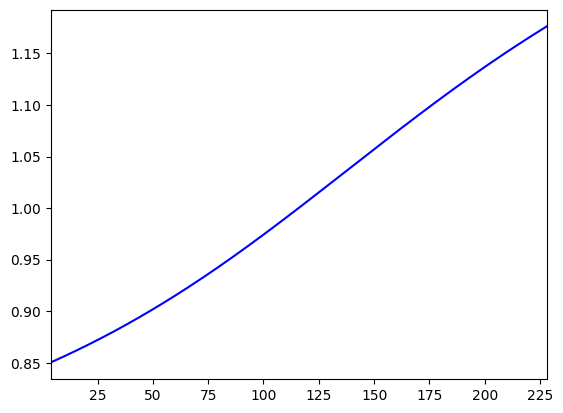

In [76]:
# Neural Network
layers = [
    tf.keras.layers.Normalization(axis=-1, input_dim=1, mean=0, variance=1, invert=False),
    tf.keras.layers.Dense(64, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(64, activation='tanh',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(64, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(64, activation='tanh',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(64, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(64, activation='tanh',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(64, activation='leaky_relu',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(64, activation='tanh',  bias_initializer='he_uniform'),
    tf.keras.layers.Dense(6, activation=tf.keras.activations.linear)
]
perceptron = tf.keras.Sequential(layers)
def model(x:Vector)->Tuple[Vector,Vector,Vector,Vector,Vector,Vector]:
    xp = (x-xmin)/(xmax - xmin)*2.0-1.0
    s = neuralnetwork(xp)
    c_l = tf.reshape(tf.exp(s[0]), (len(s[0]),1))
    h_l = tf.reshape(s[1]**2, (len(s[1]),1))
    i_l = tf.reshape(s[2]**2, (len(s[2]),1))
    c_h = tf.reshape(tf.exp(s[3]), (len(s[3]),1))
    h_h = tf.reshape(s[4]**2, (len(s[4]),1))
    i_h = tf.reshape(s[5]**2, (len(s[5]),1))
    return (c_l, h_l, i_l, c_h, h_h, i_h)

zvec = np.random.choice(Z,200).reshape(-1)
c_l, h_l, i_l, c_h, h_h, i_h = model(xvec)
print(c_l.shape)
plt.plot(xvec,c_l,label='Solved c(x)',c='b')
plt.xlim([xmin,xmax])
plt.show()

### Initial Guess

In [77]:
def residuals(k:Vector):
    c_l, h_l, i_l, c_h, h_h, i_h=model(k)
    R1 = i_l
    R2 = i_h
    R3 = c_l - (z_l*tf.pow(k,α)-ϕ*Iss)
    R4 = c_h - (z_h*tf.pow(k,α)-ϕ*Iss)
    R5 = h_l - 1
    R6 = h_h - 1
    return R1,R2,R3,R4,R5,R6

def J(n):
    x = tf.random.uniform(shape=(n,1),minval=xmin,maxval=xmax)
    R1,R2,R3,R4,R5,R6 = residuals(x)
    R_squared = R1*R1+R2*R2+R3*R3+R4*R4+R5*R5+R6*R6
    return tf.reduce_mean(R_squared)

n = 100
v = J(n)

θ = neuralnetwork.trainable_variables
from tensorflow.keras.optimizers import Adam, SGD
variables = perceptron.trainable_variables
optimizer = Adam()
optimizer.lr.assign(0.001)

@tf.function
def training_step():
    with tf.GradientTape() as tape:
        xx = J(n)
    grads = tape.gradient(xx,θ)
    optimizer.apply_gradients(zip(grads,θ))
    return xx

def train_me(K):
    vals=[]
    for k in tqdm(tf.range(K)):
        val=training_step()
        vals.append(val.numpy())
    return vals

results = train_me(10000)

100%|████████████████████████████████████| 10000/10000 [00:54<00:00, 185.14it/s]


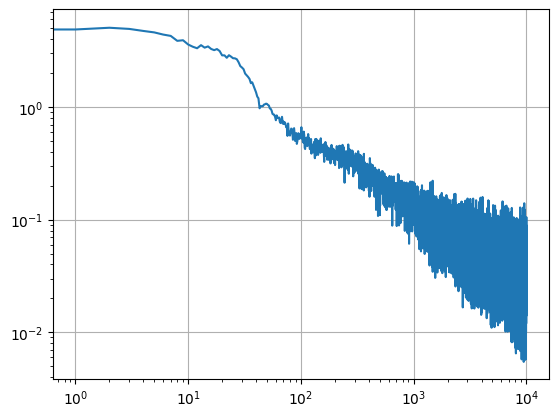

In [78]:
plt.plot(np.sqrt(results))
plt.xscale('log')
plt.yscale('log')
plt.grid()

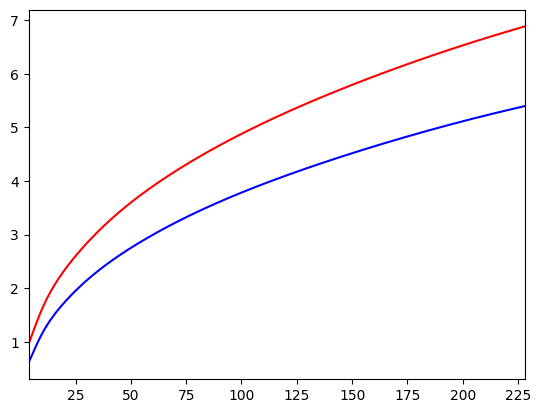

In [79]:
c_l, h_l, i_l, c_h, h_h, i_h = model(xvec)
plt.plot(xvec,c_h,label='Initial Guess c(k,high)',c='r')
plt.plot(xvec,c_l,label='Initial Guess c(k,low)',c='b')
plt.xlim([xmin,xmax])
plt.show()

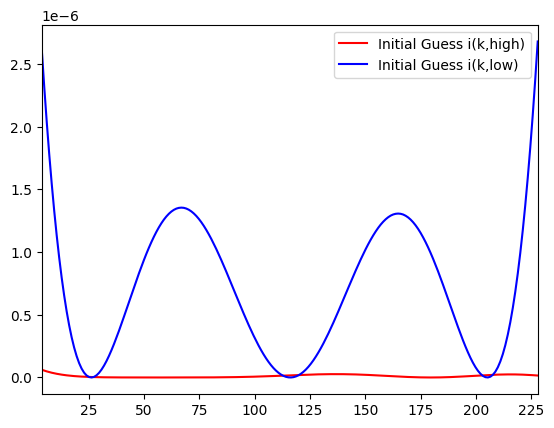

In [80]:
plt.plot(xvec,i_h,label='Initial Guess i(k,high)',c='r')
plt.plot(xvec,i_l,label='Initial Guess i(k,low)',c='b')
plt.xlim([xmin,xmax])
plt.legend()
plt.show()

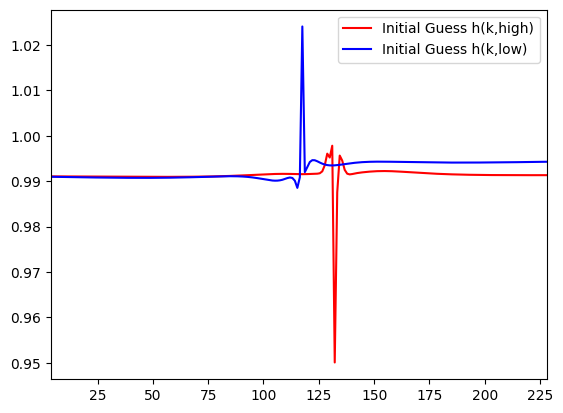

In [81]:
plt.plot(xvec,h_h,label='Initial Guess h(k,high)',c='r')
plt.plot(xvec,h_l,label='Initial Guess h(k,low)',c='b')
plt.xlim([xmin,xmax])
plt.legend()
plt.show()

### Network Learning

In [82]:
def residuals(k:Vector):
    c_l, h_l, i_l, c_h, h_h, i_h = model(k)
    inv_l = i_l+ϕ*Iss
    inv_h = i_h+ϕ*Iss
    kp_h = inv_h+(1-δ)*k
    kp_l = inv_l+(1-δ)*k
    cp_h_l, hp_h_l, ip_h_l, cp_h_h, hp_h_h, ip_h_h = model(kp_h)
    cp_l_l, hp_l_l, ip_l_l, cp_l_h, hp_l_h, ip_l_h = model(kp_l)
    
    # Euler: h = mu/u'(c) -> 1-h(k,z)-βE[(z'αk(k',z')^(α-1)+(1-δ)*(1-h(k',z')))u'(c(k',z'))|z]
    R1 = 1-h_h-β*(P[0,0]*tf.pow(cp_h_h,-σ)*(z_h*α*tf.pow(kp_h,α-1)+(1-δ)-(1-δ)*hp_h_h) \
                  +P[0,1]*tf.pow(cp_h_l,-σ)*(z_l*α*tf.pow(kp_l,α-1)+(1-δ)-(1-δ)*hp_h_h))
    R2 = 1-h_l-β*(P[1,0]*tf.pow(cp_l_h,-σ)*(z_h*α*tf.pow(kp_h,α-1)+(1-δ)-(1-δ)*hp_h_h) \
                  +P[1,1]*tf.pow(cp_l_l,-σ)*(z_l*α*tf.pow(kp_l,α-1)+(1-δ)-(1-δ)*hp_h_h)) 
    
    R3 = h_h*i_h 
    R4 = h_l*i_l
    R5 = c_h+i_h-z_h*tf.pow(k,α)   # Budget
    R6 = c_l+i_l-z_l*tf.pow(k,α)
    return R1,R2,R3,R4,R5,R6

def J(n):
    x = tf.random.uniform(shape=(n,1),minval=xmin,maxval=xmax)
    R1,R2,R3,R4,R5,R6 = residuals(x)
    R_squared = R1*R1+R2*R2+R3*R3+R4*R4+R5*R5+R6*R6
    return tf.reduce_mean(R_squared)

residuals(xvec);
n = 100
v = J(n)
v.numpy()

θ = neuralnetwork.trainable_variables
from tensorflow.keras.optimizers import Adam, SGD
variables = perceptron.trainable_variables
optimizer = Adam()
optimizer.lr.assign(0.0001)

@tf.function
def training_step():
    with tf.GradientTape() as tape:
        xx = J(n)
    grads = tape.gradient(xx,θ)
    optimizer.apply_gradients(zip(grads,θ))
    return xx

def train_me(K):
    vals=[]
    for k in tqdm(tf.range(K)):
        val=training_step()
        vals.append(val.numpy())
    return vals

In [83]:
results = train_me(150000)

100%|██████████████████████████████████| 150000/150000 [11:18<00:00, 221.20it/s]


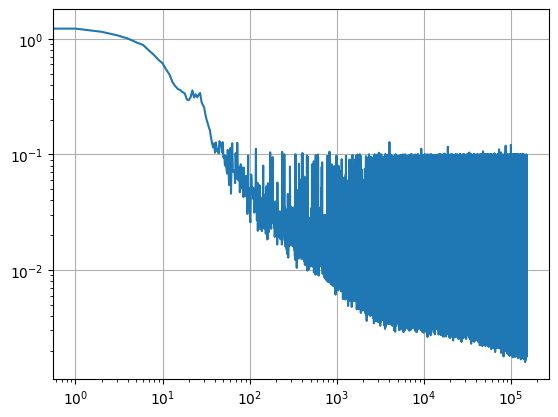

In [84]:
plt.plot(np.sqrt(results))
plt.xscale('log')
plt.yscale('log')
plt.grid()

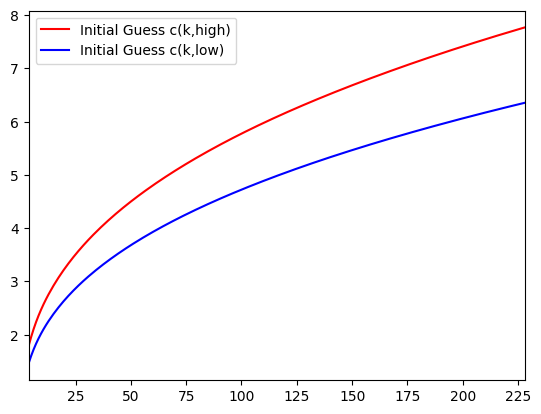

In [88]:
c_l, h_l, i_l, c_h, h_h, i_h = model(xvec)
plt.plot(xvec,c_h,label='Initial Guess c(k,high)',c='r')
plt.plot(xvec,c_l,label='Initial Guess c(k,low)',c='b')
plt.xlim([xmin,xmax])
plt.legend()
plt.show()

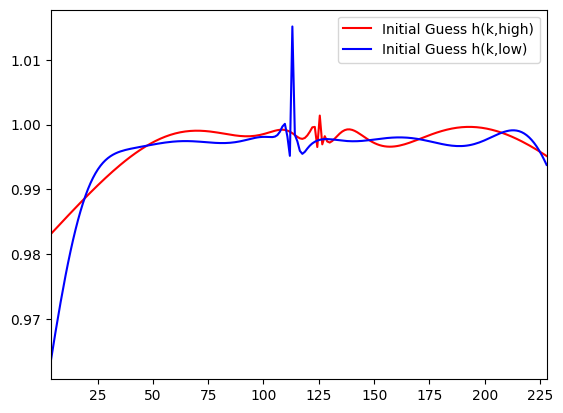

In [89]:
c_l, h_l, i_l, c_h, h_h, i_h = model(xvec)
plt.plot(xvec,h_h,label='Initial Guess h(k,high)',c='r')
plt.plot(xvec,h_l,label='Initial Guess h(k,low)',c='b')
plt.xlim([xmin,xmax])
plt.legend()
plt.show()

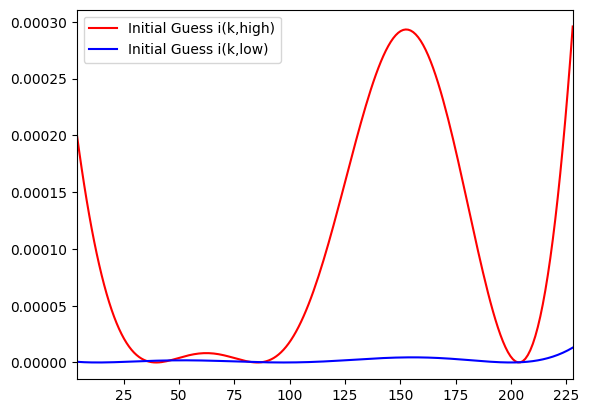

In [91]:
plt.plot(xvec,i_h,label='Initial Guess i(k,high)',c='r')
plt.plot(xvec,i_l,label='Initial Guess i(k,low)',c='b')
plt.xlim([xmin,xmax])
plt.legend()
plt.show()